### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()

#### Load the data

In [2]:
raw_data = pd.read_csv(r"C:\Users\Abraham Audu\Downloads\DS Weekend Projects\Loan Prediction\train.csv")
raw_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#check for null values

raw_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#fill null values

data = raw_data.copy()
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna('No', inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [5]:
#confirm no null values

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### EDA

In [6]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


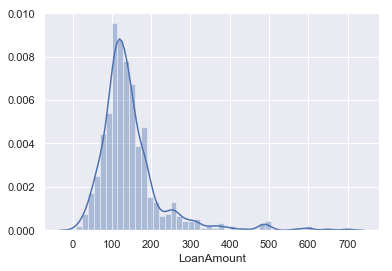

In [7]:
sns.distplot(data['LoanAmount'])

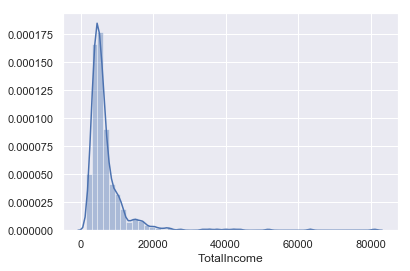

In [8]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
sns.distplot(data['TotalIncome'])

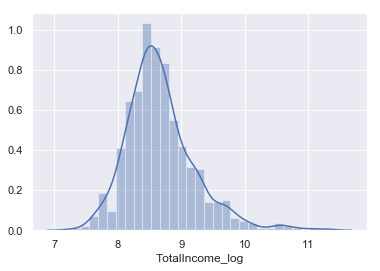

In [9]:
data['TotalIncome_log'] = np.log(data['TotalIncome'])
sns.distplot(data['TotalIncome_log'])

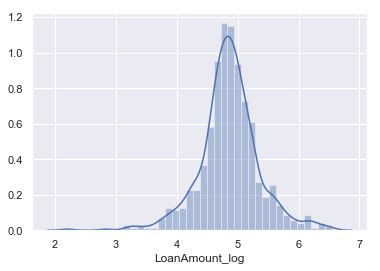

In [10]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
sns.distplot(data['LoanAmount_log'])

In [11]:
data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'TotalIncome', 'TotalIncome_log',
       'LoanAmount_log'], dtype=object)

In [12]:
#Replace strings with dummies

data_with_dummies = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status'], drop_first=True)
data_with_dummies

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,TotalIncome_log,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,1.0,5849.0,8.674026,4.986426,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,6091.0,8.714568,4.852030,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,3000.0,8.006368,4.189655,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,4941.0,8.505323,4.787492,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,6000.0,8.699515,4.948760,1,0,0,0,0,0,0,0,1,1
5,LP001011,5417,4196.0,267.000000,360.0,1.0,9613.0,9.170872,5.587249,1,1,0,1,0,0,1,0,1,1
6,LP001013,2333,1516.0,95.000000,360.0,1.0,3849.0,8.255569,4.553877,1,1,0,0,0,1,0,0,1,1
7,LP001014,3036,2504.0,158.000000,360.0,0.0,5540.0,8.619750,5.062595,1,1,0,0,1,0,0,1,0,0
8,LP001018,4006,1526.0,168.000000,360.0,1.0,5532.0,8.618305,5.123964,1,1,0,1,0,0,0,0,1,1
9,LP001020,12841,10968.0,349.000000,360.0,1.0,23809.0,10.077819,5.855072,1,1,1,0,0,0,0,1,0,0


In [13]:
data_with_dummies.columns.values

array(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'TotalIncome',
       'TotalIncome_log', 'LoanAmount_log', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype=object)

In [14]:
['Loan_Amount_Term', 'Credit_History',
       'TotalIncome_log', 'LoanAmount_log', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban']

['Loan_Amount_Term',
 'Credit_History',
 'TotalIncome_log',
 'LoanAmount_log',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

## Regression Template

#### import models from scikit learn module

In [15]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#### function for generic classificstion model and acessing performance

In [37]:
def classification_model(model, data, predictors, outcome):
    
    #fit the model
    model.fit(data[predictors],data[outcome])
    
    #make predictions
    predictions = model.predict(data[predictors])
    
    #print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0: .3%}".format(accuracy))
    
    #fit model again so it can be referred to outside function
    model.fit(data[predictors],data[outcome])

In [68]:
from sklearn.linear_model import LinearRegression
predictors = ['Loan_Amount_Term', 'Credit_History',
       'TotalIncome_log', 'LoanAmount_log', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban']
outcome = ['Loan_Status_Y']
model = LogisticRegression()
data = data_with_dummies
classification_model(model, data, predictors, outcome)

Accuracy :  80.945%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Preprocess Test Data

In [69]:
test_data = pd.read_csv(r"C:\Users\Abraham Audu\Downloads\DS Weekend Projects\Loan Prediction\test.csv")
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [70]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### fill missing values

In [71]:
test = test_data.copy()
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna('No', inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

#### transfrom extreme values

In [72]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

#### create dummies

In [73]:
test_preprocessed = pd.get_dummies(test, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'], drop_first=True)
test_preprocessed

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,TotalIncome_log,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,5720,8.651724,4.700480,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,1.0,4576,8.428581,4.836282,1,1,1,0,0,0,0,0,1
2,LP001031,5000,1800,208.0,360.0,1.0,6800,8.824678,5.337538,1,1,0,1,0,0,0,0,1
3,LP001035,2340,2546,100.0,360.0,1.0,4886,8.494129,4.605170,1,1,0,1,0,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,3276,8.094378,4.356709,1,0,0,0,0,1,0,0,1
5,LP001054,2165,3422,152.0,360.0,1.0,5587,8.628198,5.023881,1,1,0,0,0,1,1,0,1
6,LP001055,2226,0,59.0,360.0,1.0,2226,7.707962,4.077537,0,0,1,0,0,1,0,1,0
7,LP001056,3881,0,147.0,360.0,0.0,3881,8.263848,4.990433,1,1,0,1,0,1,0,0,0
8,LP001059,13633,0,280.0,240.0,1.0,13633,9.520249,5.634790,1,1,0,1,0,0,0,0,1
9,LP001067,2400,2400,123.0,360.0,1.0,4800,8.476371,4.812184,1,0,0,0,0,1,0,1,0


#### predictions

In [74]:
test_predictions = model.predict(test_preprocessed[predictors])
test_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [75]:
results = pd.DataFrame()
results['Loan_ID'] = test_preprocessed['Loan_ID']
results['Loan_Status'] = test_predictions
results['Loan_Status'] = results['Loan_Status'].map({1:'Y',0:'N'})
results

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [76]:
results.to_csv('project_results-V2.0.csv', index = False)